# DSCI 503 - Homework 05

### Felix Asare

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1: Working with 2D Arrays

In [4]:
# Using np.random.uniform to generate random 5X8 matrix
np.random.seed(1)
Z = np.random.uniform(0, 10, (5, 8))

# Round the matrix to 2 decimal places
Z = np.round(Z, 2)
print(Z)

[[4.17 7.2  0.   3.02 1.47 0.92 1.86 3.46]
 [3.97 5.39 4.19 6.85 2.04 8.78 0.27 6.7 ]
 [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
 [8.76 8.95 0.85 0.39 1.7  8.78 0.98 4.21]
 [9.58 5.33 6.92 3.16 6.87 8.35 0.18 7.5 ]]


In [5]:
# Print 3rd row and 6th column
print(" Row 3: ", Z[2])
print(" Column 6: ", Z[:, 5])

 Row 3:  [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
 Column 6:  [0.92 8.78 9.68 8.78 8.35]


In [6]:
# Use np.sum() to calculate the sum of the matrix
print("Row Sums: ", np.sum(Z, axis=1))
print("Column Sums: ", np.sum(Z, axis=0))
print("Array Sums: ", np.sum(Z))

Row Sums:  [22.1  38.19 40.88 34.62 47.89]
Column Sums:  [30.65 32.46 13.36 15.4  20.09 36.51  6.42 28.79]
Array Sums:  183.68


## Problem 2: Reshaping and Stacking Arrays

In [9]:
# Setting seed
np.random.seed(167)

# Create arrays named x1, x2, x3, and x4. Each array should be a 1D array with 1000 elements drawn at random from a normal distribution
x1 = np.random.normal(50, 10, 1000)
x2 = np.random.normal(20, 5, 1000)
x3 = np.random.normal(100, 30, 1000)
x4 = np.random.normal(10, 2, 1000)

# Use reshape() to create column arrays based on x1, x2, x3, and x4. Use np.hstack() to combine the  resulting column arrays into a 1000x4 array named X.
X = np.hstack((x1.reshape(-1, 1), x2.reshape(-1, 1), x3.reshape(-1, 1), x4.reshape(-1, 1)))

# Dounding X to 2 decimal places
X = np.round(X, 2)


(1000, 4)


In [8]:
# Printing element in the first 6 rows of X
print(X[0:6])

[[ 37.08  16.71 138.06   8.89]
 [ 41.32  19.91  99.61   9.86]
 [ 63.15  14.43  70.08  11.6 ]
 [ 50.03  12.71  95.05   8.47]
 [ 55.05  24.4   62.16   9.49]
 [ 59.24  25.68  64.57  12.84]]


## Problem 3: Standardization

In [12]:
# Use np.mean() to calculate the column means for X. Store the resulting array in a variable.
column_means = np.mean(X, axis=0)

# Use np.std() to calculate the column standard deviations for X. Store the resulting array in a variable.
column_std = np.std(X, axis=0)

# Print the column means and column standard deviations rounding to 2 decimal places
print("Column Means:               ", np.round(column_means, 2))
print("Column Standard Deviations: ", np.round(column_std, 2))


Column Means:                [50.21 19.86 99.84 10.06]
Column Standard Deviations:  [ 9.69  5.08 30.88  2.03]


## Problem 4: Load Auto MPG Dataset

In [17]:
# Load the contents of this file into a pandas DataFrame
auto = pd.read_csv('auto_mpg.txt', sep='\t')
auto.head(10)

,mpg,cyl,wt,region,model
0,27.2,4,3190,eur,peugeot 504
1,32.8,4,1985,asia,mazda glc deluxe
2,18.1,6,3410,usa,amc concord d/l
3,17.5,8,4080,usa,dodge magnum xe
4,25.4,5,3530,eur,mercedes benz 300d
5,31.0,4,1773,asia,toyota corolla 1200
6,27.4,4,2670,usa,amc spirit dl
7,39.1,4,1755,asia,toyota starlet
8,34.3,4,2188,eur,audi 4000
9,30.0,4,2155,usa,buick opel isuzu deluxe


In [18]:
# Print the shape of the auto DataFrame.
print(auto.shape)

(398, 5)


In [22]:
# Call the mean() method of auto and print the results.
print(auto.select_dtypes(include=[np.number]).mean())

mpg      23.514573
cyl       5.454774
wt     2970.424623
dtype: float64


## Problem 5: Regional Counts and Means

In [24]:
# Use np.unique() to obtain an array of unique values appearing in the region column of auto
regions = np.unique(auto['region'])
print(regions)

['asia' 'eur' 'usa']


In [25]:
# Use boolean masking to create three new DataFrames named asia_auto, eur_auto, and usa_auto. Each of these new DataFrames should contain the rows of auto associated with one of the values of region.
asia_auto = auto[auto['region'] == 'asia']
eur_auto = auto[auto['region'] == 'eur']
usa_auto = auto[auto['region'] == 'usa']


In [26]:
# Use len() or the shape attribute to determine the number of rows in each of the new DataFrames.
print("Number of cars in Asia:   ", len(asia_auto))
print("Number of cars in Europe: ", len(eur_auto))
print("Number of cars in USA:    ", len(usa_auto))

Number of cars in Asia:    79
Number of cars in Europe:  70
Number of cars in USA:     249


In [27]:
# Create three new arrays named asia_means, eur_means, and usa_means. Each array should have three elements, which should be the average values of mpg, cyl, and wt for the relevant region.
asia_means = asia_auto[['mpg', 'cyl', 'wt']].mean()
eur_means = eur_auto[['mpg', 'cyl', 'wt']].mean()
usa_means = usa_auto[['mpg', 'cyl', 'wt']].mean()

In [28]:
# Use the arrays to create a new DataFrame named mean_df. The DataFrame should have three columns named mpg, cyl, and wt. Each row of this DataFrame should represent one of the three regions, and the index for the DataFrame should be set to indicate the name of the region using the previously created regions array.
mean_df = pd.DataFrame([asia_means, eur_means, usa_means], index=regions)
mean_df.head()

,mpg,cyl,wt
asia,30.450633,4.101266,2221.227848
eur,27.891429,4.157143,2423.300000
usa,20.083534,6.248996,3361.931727


## Problem 6: Average Weight and MPG by Region

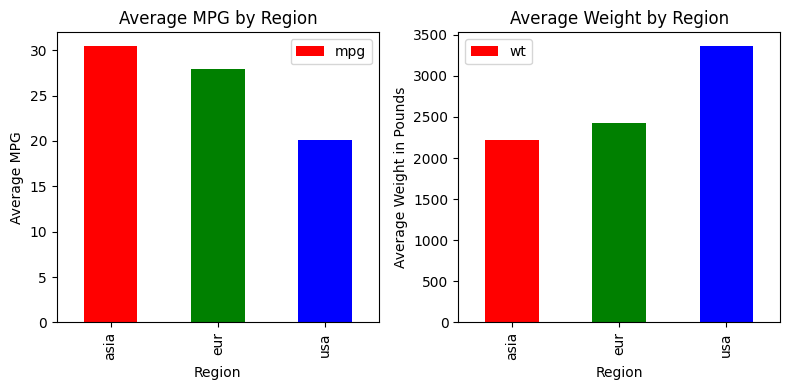

In [32]:
# Create a list named colors1 containing three named colors that display well and are easy to distinguish from another
colors1 = ['red', 'green', 'blue']

# Use the DataFrame mean_df from Problem 5 to create a single figure with two side-by-side bar charts.
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
mean_df.plot(kind='bar', y='mpg', ax=ax[0], color=colors1, 
             title='Average MPG by Region', ylabel='Average MPG', xlabel='Region')
mean_df.plot(kind='bar', y='wt', ax=ax[1], color=colors1, 
             title='Average Weight by Region', ylabel='Average Weight in Pounds', xlabel='Region')
plt.tight_layout()
plt.show()

## Problem 7: Relationship between Weight and Miles Per Gallon

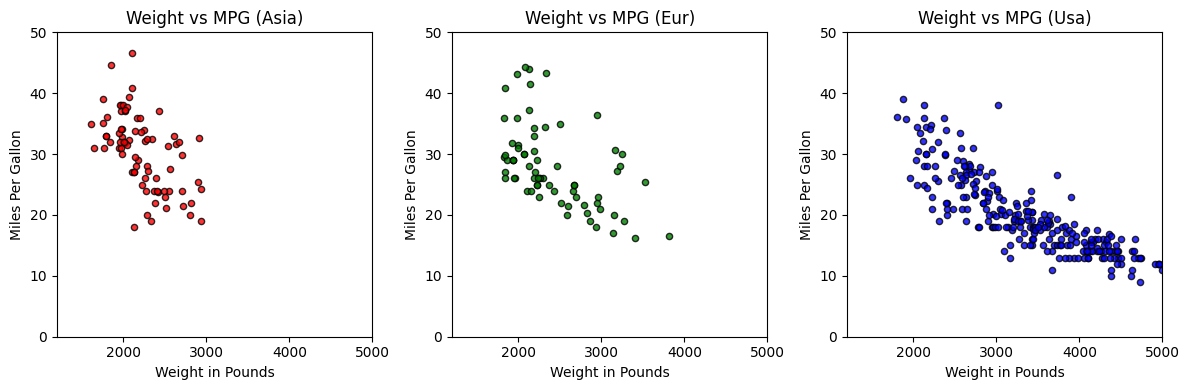

In [33]:
# create a scatter plot for each region displaying the relationship between MPG and weight for vehicles manufactured in each region.
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i, region in enumerate(regions):
    region_auto = auto[auto['region'] == region]
    region_auto.plot(kind='scatter', x='wt', y='mpg', ax=ax[i], color=colors1[i], edgecolor='black', alpha=0.8)
    ax[i].set_xlim(1200, 5000)
    ax[i].set_ylim(0, 50)
    ax[i].set_xlabel('Weight in Pounds')
    ax[i].set_ylabel('Miles Per Gallon')
    ax[i].set_title(f'Weight vs MPG ({region.capitalize()})')
plt.tight_layout()
plt.show()

## Problem 8: Cylinder Distribution by Region

In [34]:
# Use np.unique() to create a list of unique values appearing in the cyl column of the auto DataFrame
cyl_values = np.unique(auto['cyl'])
print(cyl_values)

[3 4 5 6 8]


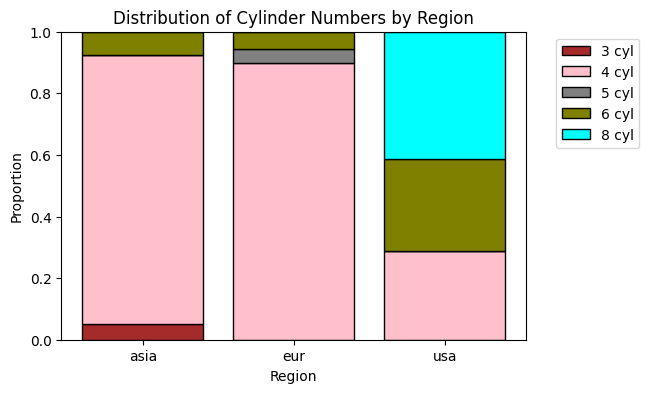

In [40]:

cyl_counts_by_region = pd.crosstab(auto['cyl'], auto['region'])
cyl_props_by_region = cyl_counts_by_region.div(cyl_counts_by_region.sum())
bar_bottoms = np.cumsum(cyl_props_by_region) - cyl_props_by_region

colors2 = ['brown', 'pink', 'gray', 'olive', 'cyan']
plt.figure(figsize=[6, 4])

for i, (index, row) in enumerate(cyl_props_by_region.iterrows()):
    plt.bar(cyl_props_by_region.columns, row, bottom=bar_bottoms.iloc[i],
            label=str(index) + ' cyl', color=colors2[i], edgecolor='black')
    
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.title('Distribution of Cylinder Numbers by Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()